In [ ]:
# Publish on Github a Repo 

# Open a folder in local and Publish on Github , select files and name and BOOm !! Done .(Do this using Git Source )

!pip install wget

# to downlaod the stl-10 daatset in my CWD

import wget # for downloading files from online servers \
import os

# download files from server's url

url = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# make a dir to save that dataset

target_dir = "stl10"

# ifthe above path (of dir to save daatset) does NOT exist , then make such a dir
if not os.path.exists(target_dir) :
    os.mkdir(target_dir)


# download the img dataset into that dir

file = wget.download( url , out = target_dir)





In [ ]:
!pip install tarfile

import numpy as np

# Now , the images are in binary format , so converting them into RGB

# for storing decompressed files

decompress_dir_path = 'stl10/stl10_binary.tar.gz'

# for de-compress the bianry img files

import tarfile

# make a dir to store the binary train & test imgs
data_dir = 'stl10'

# extracting the compressed bin file

with tarfile.open(decompress_dir_path , 'r:gz') as tar  :
  tar.extractall (path= data_dir ) # after extraction , storing it in the same old dir of stl10


# and connect the compete path of training and testing images (in binary but un-compressed format )
train_data_path = os.path.join (data_dir , 'stl10_binary' , 'train_X.bin')
test_data_path = os.path.join(data_dir , 'stl10_binary' , 'test_X.bin')


train_y_path = os.path.join (data_dir , 'stl10_binary' , 'train_y.bin')
test_y_path = os.path.join(data_dir , 'stl10_binary' , 'test_y.bin')


num_train_img = 5000
num_test_img = 8000

# stl-10 dataset has each image of size (96 * 96 * 3)

height = 96
width = 96
channels =3

# load/ READ  the binary train images and test images and convert it into proper INT format (RGB format  )

train_data = np.fromfile(train_data_path, dtype = np.uint8 ) # dtype = final form in which WE want our img / file to be .
test_data = np.fromfile (test_data_path , dtype= np.uint8)


train_y = np.fromfile(train_y_path, dtype = np.uint8 ) # dtype = final form in which WE want our img / file to be .
test_y = np.fromfile (test_y_path , dtype= np.uint8)


# make sure to get the img in 96*96 px format

train_data = train_data.reshape( (num_train_img  , channels , height , width  )).transpose(0 , 2 , 3, 1)
test_data = test_data.reshape( (num_test_img  , channels , height , width  )).transpose(0,2, 3, 1)



ERROR: Could not find a version that satisfies the requirement tarfile (from versions: none)
ERROR: No matching distribution found for tarfile


In [ ]:
!pip install opencv-python


In [ ]:
import cv2

In [ ]:
# augmenting the image 

def rotate (image)  :

  # Define the rotation angle (in degrees)
  angle = 180  # Clockwise rotation

  # Get the height and width of the image
  height, width = image.shape[:2]

  # Calculate the rotation matrix
  rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

  # Apply the rotation to the image
  rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

  return rotated_image



In [ ]:
for i in range(len(train_data[:5])) :
  train_data[i] = rotate(train_data[i])



In [ ]:
labels = [
    "Airplane",
    "Bird",
    "Car",
    "Cat",
    "Deer",
    "Dog",
    "Horse",
    "Monkey",
    "Ship",
    "Truck"
]

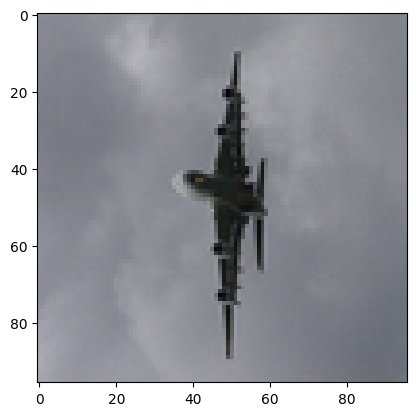

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_data[30])
plt.show()






In [ ]:
# importing Res Net

import tensorflow as tf
from tensorflow import keras


In [ ]:
# pre-process images

def preprocess (img) :
  img1 = keras.applications.vgg19.preprocess_input(img)
  img1  = tf.image.resize(img , [96 , 96 ])
  return img1

In [ ]:
# splitting into0 training set and validation set

from sklearn.model_selection import train_test_split

train_x  = train_data[:5]
train_y = train_y [:5]


**SUPERVISED ML ALGORITHM**

In [ ]:
# using vgg19 CNN architecture

base_model = keras.applications.vgg19.VGG19(weights = None ,  input_shape = (96,96,3) , include_top = False  )
# we have to remove the top layer of FCN since vgg19 is arch. is made to work foriagenet dataset , which has 1000 classes so 1000 neurons in last layer
# instead we want 10 neurons .

# Use functional API

layer1 = keras.layers.Flatten()(base_model.output)
layer2 = keras.layers.Dense(20 , activation = "relu")(layer1)
layer3 = keras.layers.Dense(10 , activation = "softmax")(layer2)

# complete model ( by stacking these models)
model = keras.Model (inputs = base_model.input , outputs = layer3)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = "sgd" , metrics =["accuracy"] )

In [ ]:
model.fit(train_x[:5] , train_y-1 , epochs =10)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 2.3879 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 2.1536 - accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 1.9651 - accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 1.8013 - accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 6s 6s/step - loss: 1.9082 - accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 2.7879 - accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 2.2971 - accuracy: 0.2000
Epoch 8/10
1/1 [==============================] - 5s 5s/step - loss: 2.2773 - accuracy: 0.2000
Epoch 9/10
1/1 [==============================] - 4s 4s/step - loss: 2.2627 - accuracy: 0.2000
Epoch 10/10
1/1 [==============================] - 5s 5s/step - loss: 2.2477 - accuracy: 0.4000


In [ ]:
prediction = model.predict(train_data[10:11])
ind = np.argmax (prediction)

labels[ind]

1/1 [==============================] - 1s 1s/step


'Cat'

In [ ]:
arr = []

for i in range(20) :
  arr.append (np.argmax(model.predict(test_data[i:i+1])))

1/1 [==============================] - 0s 281ms/step


In [ ]:
test_predict = np.array(arr)
# predictions 

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score (test_y[:20] , test_predict)

print(f'accuracy of spervised approach = {accuracy * 100}%')

accuracy of spervised approach = 0.0%


**SELF-SUPERVISED ML ALGORITHM**

In [ ]:
# using vgg19 CNN architecture

base_model1 = keras.applications.vgg19.VGG19(weights = None ,  input_shape = (96,96,3) , include_top = False  )


In [ ]:
# unlabeled dataset of images

train_x = train_data[ : 1000]
train_x1 = []

# roate the images (augment it) so cnn can learn important feature representations
for i in range(len(train_x)) :
  train_x1.append(rotate(train_x[i]))

arr = np.array(train_x1)

In [ ]:


augmented_img  = keras.Sequential([
   #keras.layers.experimental.preprocessing.Resizing(96,96) ,
    keras.layers.experimental.preprocessing.RandomRotation(factor = 0.10),
     keras.layers.experimental.preprocessing.Resizing(96,96) ,
])

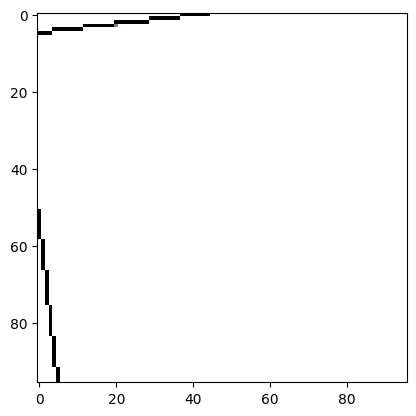

In [ ]:

plt.imshow(augmented_img(train_data[1]))
plt.show()

In [ ]:
inp= keras.layers.Input(shape = (96,96,3))
augment = augmented_img(inp)
reconstruct = base_model1(augment)
reconstruct1 = tf.image.resize(reconstruct , [96 , 96])
#reconstruct1 = reconstruct1.reshape(-1,96,96,3)
ssl_model = keras.Model (inputs = inp , outputs = reconstruct1)

In [ ]:
def change(img) :
  img1 = tf.image.resize(img , [96,96])
  return img1

In [ ]:
# base_model1(augmented_img(train_x[1:2]))

In [ ]:

ssl_model.compile(loss = "mse" , optimizer= 'sgd' , metrics = ['accuracy'])
ssl_model.fit(train_x[:10],  change(base_model1(augmented_img(train_x[:10])) ), epochs = 1)



1/1 [==============================] - 15s 15s/step - loss: 1.1082e-04 - accuracy: 0.8603


1/1 [==============================] - 1s 631ms/step


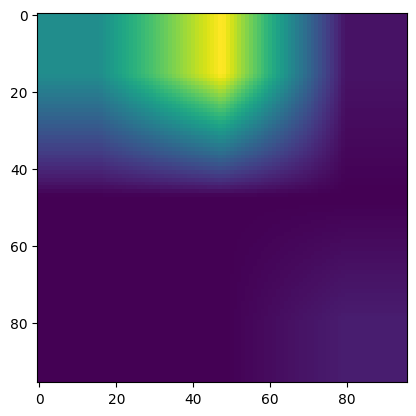

1/1 [==============================] - 0s 308ms/step


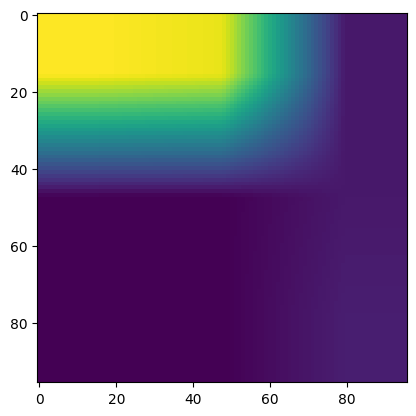

(96, 96)

In [ ]:
img1 = ssl_model.predict(train_data[101:102])

img1 = np.squeeze(img1[:1 , : , : , :1])
plt.imshow(img1)
plt.show()
img1.shape
img1 = ssl_model.predict(train_data[11:12])

img1 = np.squeeze(img1[:1 , : , : , :1])
plt.imshow(img1)
plt.show()
img1.shape

**Semi-Supervised ML Algorithm - (Approach1)**

In [ ]:
model2 = keras.applications.vgg19.VGG19 (weights = None , input_shape = (96,96 , 3) , include_top = False)

layer1 = keras.layers.Flatten()(model2.output)
layer2 = keras.layers.Dense(20 , activation= "relu")(layer1)
layer3 = keras.layers.Dense(10, activation = "softmax")(layer2)


model4= keras.Model(inputs = model2.input , outputs =layer3 )

In [ ]:
# small labeled dataset
x = train_data[:5]
y = train_y[ : 5]

In [ ]:
model4.compile(loss = "sparse_categorical_crossentropy" , optimizer = "sgd", metrics = ['accuracy'])
model4.fit(x , y , epochs =2 )


Epoch 1/2
1/1 [==============================] - 8s 8s/step - loss: 2.3017 - accuracy: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 3s 3s/step - loss: 2.2178 - accuracy: 0.6000


In [ ]:
test_predict_ul = np.array(arr)

In [ ]:
predict = model4.predict(train_data[1:2])
ind = np.argmax(predict)

labels[ind]


1/1 [==============================] - 0s 474ms/step


'Deer'

In [ ]:
x1 = train_data[10:25]


In [ ]:
# Producing pseudo labels for unlabeled dataset by direct prediction (from small-sclae trained model )

psuedo_labels  = model4.predict(x1)
lis = []

psuedo_labels.shape

for i in range(15) :
  ind1 = np.argmax(psuedo_labels[i])
  lis.append(ind1)

lis = np.array(lis)


1/1 [==============================] - 3s 3s/step


In [ ]:
lis.shape

(15,)

In [ ]:
# concataniting images dataset

X = np.vstack((x , x1))
Y = np.concatenate((y , lis))
Y.shape

(20,)

In [ ]:
# Now , training  the samew model  this new concatenated dataseet ( of predicted psuedo and actual labels )

model4.fit(X , Y , epochs = 2)

Epoch 1/2
1/1 [==============================] - 17s 17s/step - loss: 1.9833 - accuracy: 0.8000
Epoch 2/2
1/1 [==============================] - 10s 10s/step - loss: 0.9879 - accuracy: 0.8000


In [ ]:
tr = model4.predict(train_data[2:3])
labels[np.argmax(tr)]

1/1 [==============================] - 1s 544ms/step


'Deer'

In [ ]:
arr = []

for i in range(20) :
  arr.append (np.argmax(model4.predict(test_data[i:i+1])))

1/1 [==============================] - 0s 283ms/step


In [ ]:
test_predict_ul = np.array(arr)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score (test_y[:20] , test_predict_ul)

print(f'accuracy of semi - supervised approach = {accuracy * 100}%')

accuracy of semi - supervised approach = 5.0%


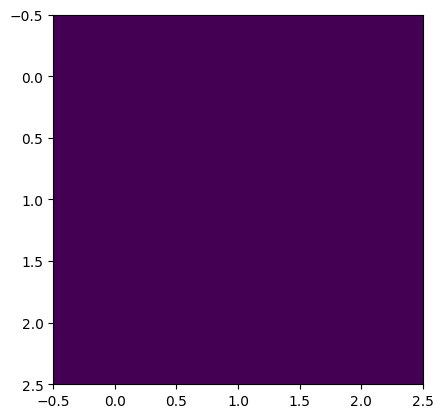

In [ ]:

# feature maps from one of the images from cnn model trianed on small labeled dataset
img1 = model2(train_data[30:31])
img1 = np.squeeze(img1[:1 , : , : , :1]) # using squeeze with sliced part of image since no of channels are too large for plt.imshow to show
plt.imshow(img1)
plt.show()


**Semi-Supervised ML Algorithm - (Approach2) -Ensemble Method**

In [ ]:
# Using ensemble methods to produce pseudo labels and do better predictions

model_l1 = keras.applications.vgg19.VGG19 (weights = None , input_shape = (96,96 , 3) , include_top = False)

layer1 = keras.layers.Flatten()(model_l1.output)
layer2 = keras.layers.Dense(20 , activation= "relu")(layer1)
layer3 = keras.layers.Dense(10, activation = "softmax")(layer2)


model12= keras.Model(inputs = model_l1.input , outputs =layer3 )

In [ ]:

# wrapping my soft voting cnn models in a hard voting classifier to make it compatinle with hard voting ensembles .
from sklearn.base import BaseEstimator, ClassifierMixin

class CNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=2, batch_size=32)  # You can adjust the number of epochs and batch size
        return self


    def predict(self, X):

      x2 =self.model.predict(X)
      x3 = X.reshape((x2.shape[0], 96, 3))
      return x3


model4_classifier = CNNClassifier(model4)
ssl_model_classifier = CNNClassifier(ssl_model)

In [ ]:
x1 = train_data[:5]
y1 = train_y[ : 5]

In [ ]:

psuedo_labels.shape

(15, 10)

In [ ]:
# doing soft voting classification
from sklearn.ensemble import VotingClassifier

# for hard voting class.
clf = VotingClassifier(estimators = [ ("m4" , model4) , ("model" ,model)] , voting = "hard")

# for soft voting class.
model4.fit(x , y)
model.fit(x,y)

1/1 [==============================] - 4s 4s/step - loss: 2.3502 - accuracy: 0.0000e+00


In [ ]:
p1 = model.predict(test_data[4:5])

1/1 [==============================] - 0s 257ms/step


In [ ]:
p2 = model4.predict(test_data[4:5])


1/1 [==============================] - 0s 313ms/step


In [ ]:
def produce_label(p1 , p2):
  lis1 = []
# average predictions for soft voting classifications
  for i in range(10) :

    lis1.append( (p1[0][i]+p2[0][i]) /2)

  ind_req = np.argmax(lis)
  return ind_req


In [ ]:
p1 = model.predict(train_data[10:10+1])
p1

1/1 [==============================] - 0s 248ms/step


array([[0.09703954, 0.10519382, 0.09856465, 0.10661522, 0.09980753,
        0.10237247, 0.09233749, 0.10066012, 0.09822015, 0.09918897]],
      dtype=float32)

In [ ]:
# making pseud labels for this

def produce_labels(n) :
  lis3 = []
  for i in range(n) :
    pse = []
    p1 = model.predict(train_data[i:i+1])
    p2 = model.predict(train_data[i:i+1])
    for j in range(10) :
      pse.append((p1[0][j]+p2[0][j])/2)
    t = np.argmax(pse)
    lis3.append(t)



    return np.array(lis3)





In [ ]:
p4 = produce_labels(10)
p4


1/1 [==============================] - 0s 261ms/step


array([1])

In [ ]:
# again training the models on these average labels and then using them collectively as ensemble to producer pseudo labels
model.fit(train_data[:1] , p4)


1/1 [==============================] - 3s 3s/step - loss: 2.2396 - accuracy: 1.0000


In [ ]:

# and now doinfg predictions using new model
res = np.argmax(model.predict(test_data[11:12]))

labels[res]

1/1 [==============================] - 0s 271ms/step


'Bird'